In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt5
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import ticker
import csv
import numpy as np
import os

## Load data

In [6]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_fault_only_0.0001'
dir_list = os.listdir(log_folder)
num_robots = 15
balance_ens = []
for idx in range(num_robots):
    balance_record = []
    csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
    with open(csv_file,"r") as f:
        reader = csv.reader(f, delimiter=' ')
        next(reader, None)
        for row in reader:
            balance_record.append(float(row[2]))
    balance_ens.append(balance_record)

## Balance evolution of top 3 best agents and worst agents
STD difference between agents: 0.001

minimum_length:  1766


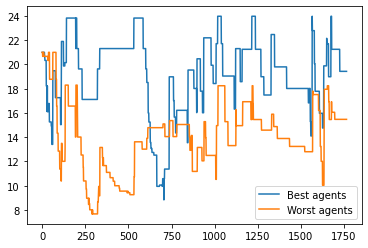

<Figure size 432x288 with 0 Axes>

In [7]:
top_agents=3
top_agent_balance = []

#look for minimum record length
length = len(balance_ens[0])
for record in balance_ens:
    if len(record)<length:
        length=len(record)
print('minimum_length: ',length)

top_agent_balance = np.array(balance_ens[0][:length])
worst_agent_balance = np.array(balance_ens[-1][:length])
for idx in range(top_agents-1):
    top_agent_balance += np.array(balance_ens[idx+1][:length])
    worst_agent_balance += np.array(balance_ens[-(idx+2)][:length])
top_agent_balance/=top_agents
worst_agent_balance/=top_agents
plt.plot(top_agent_balance, label = "Best agents")
plt.plot(worst_agent_balance, label = "Worst agents")
plt.legend()
plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_0001.eps', format='eps')

## Balance evolution of top 3 best agents and worst agents
STD difference between agents: 0.003

minimum_length:  1767


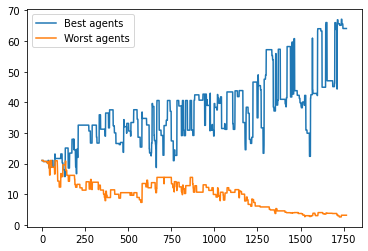

In [8]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_fault_only_0.0003'
dir_list = os.listdir(log_folder)
num_robots = 15
balance_ens = []
for idx in range(num_robots):
    balance_record = []
    csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
    with open(csv_file,"r") as f:
        reader = csv.reader(f, delimiter=' ')
        next(reader, None)
        for row in reader:
            balance_record.append(float(row[2]))
    balance_ens.append(balance_record)
top_agents=3
top_agent_balance = []

#look for minimum record length
length = len(balance_ens[0])
for record in balance_ens:
    if len(record)<length:
        length=len(record)
print('minimum_length: ',length)

top_agent_balance = np.array(balance_ens[0][:length])
worst_agent_balance = np.array(balance_ens[-1][:length])
for idx in range(top_agents-1):
    top_agent_balance += np.array(balance_ens[idx+1][:length])
    worst_agent_balance += np.array(balance_ens[-(idx+2)][:length])
top_agent_balance/=top_agents
worst_agent_balance/=top_agents
plt.plot(top_agent_balance, label = "Best agents")
plt.plot(worst_agent_balance, label = "Worst agents")
plt.legend()
plt.show()
#plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_0003.eps', format='eps')

## Balance evolution of the malicious agent

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


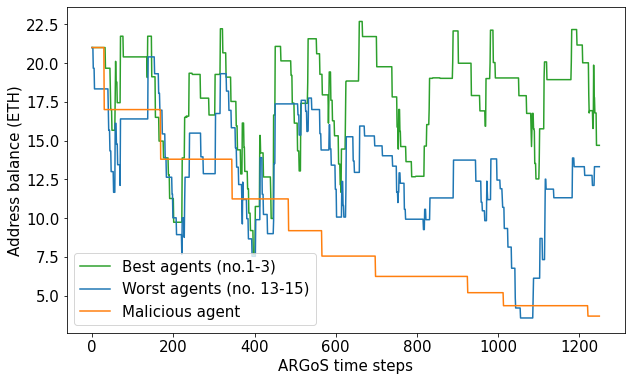

In [2]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_constant_redistribution_002'
dir_list = os.listdir(log_folder)
num_robots = 16
balance_ens = []
for idx in range(num_robots):
    balance_record = []
    csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
    with open(csv_file,"r") as f:
        reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
        next(reader, None)
        for row in reader:
            if len(row)>0:

                balance_record.append(float(row[2]))
    balance_ens.append(balance_record)
top_agents=3
top_agent_balance = []
#look for minimum record length
length = len(balance_ens[0])
for record in balance_ens:
    if len(record)<length:
        length=len(record)
length = 1250
top_agent_balance = np.array(balance_ens[0][:length])
worst_agent_balance = np.array(balance_ens[-2][:length])
malicious_agent_balance = np.array(balance_ens[-1][:length])
for idx in range(top_agents-1):
    top_agent_balance += np.array(balance_ens[idx+1][:length])
    worst_agent_balance += np.array(balance_ens[-(idx+3)][:length])
top_agent_balance/=top_agents
worst_agent_balance/=top_agents
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(top_agent_balance, 'tab:green', label = "Best agents (no.1-3)")
plt.plot(worst_agent_balance, 'tab:blue', label = "Worst agents (no. 13-15)")
plt.plot(malicious_agent_balance, 'tab:orange', label = "Malicious agent")
plt.xlabel('ARGoS time steps')
plt.ylabel('Address balance (ETH)')
plt.legend()
#plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_with_malicious_0002.eps', format='eps')

## Ratio between deposit for Food and Non-Food of confirmed food sources

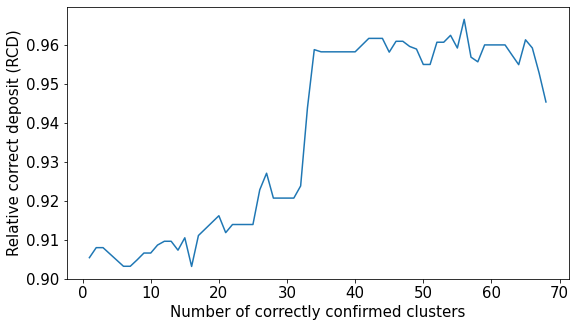

In [3]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_003_with_cluster_tracking'
csv_file = log_folder+'/'+str(int(1))+'/cluster_status.csv'
ratio_list=[]
ratio_idx_list=[]
idx=1
sw=30
ratio_list_smooth=[]
with open(csv_file,"r") as f:
        reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
        next(reader, None)
        for row in reader:
            if len(row)>0:
                if int(row[9][0]) == int(row[-1]) == 1 and int(row[6][:-1])==15:
                    ratio_list.append(float(row[8][:-1])/float(row[7][:-1]))
                    ratio_idx_list.append(idx)
            idx+=1
for idx in range(len(ratio_list)-sw):
    ratio_list_smooth.append(np.sum(ratio_list[idx:idx+sw])/sw)
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (9,5)
plt.plot(ratio_idx_list[:-sw],ratio_list_smooth)
plt.xlabel("Number of correctly confirmed clusters")
plt.ylabel("Relative correct deposit (RCD)")
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_verified_clusters_0003.eps', format='eps')

## Number of confirmed non-food-source points

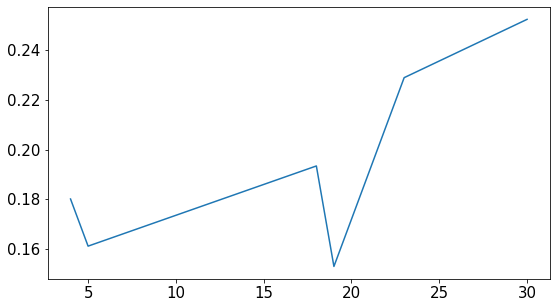

In [4]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_003_with_cluster_tracking'
csv_file = log_folder+'/'+str(int(1))+'/cluster_status.csv'
ratio_list=[]
ratio_idx_list=[]
idx=1
sw=5
ratio_list_smooth=[]
with open(csv_file,"r") as f:
        reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
        next(reader, None)
        for row in reader:
            if len(row)>0:
                if int(row[9][0]) == int(row[-1]) == 0 and int(row[6][:-1])==15:
                    ratio_list.append(float(row[8][:-1])/float(row[7][:-1]))
                    ratio_idx_list.append(idx)
            idx+=1
for idx in range(len(ratio_list)-sw):
    ratio_list_smooth.append(np.sum(ratio_list[idx:idx+sw])/sw)
plt.plot(ratio_idx_list[:-sw],ratio_list_smooth)
plt.show()

## Paper config

In [5]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/logs'
top_agents = 3

def balanceAnalyse(log_folder, top_agents, length=-1, num_robots=16):
    dir_list = os.listdir(log_folder)
    balance_ens = []
    for idx in range(num_robots):
        balance_record = []
        csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
        with open(csv_file,"r") as f:
            reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
            next(reader, None)
            for row in reader:
                if len(row)>0:
                    balance_record.append(float(row[2]))
        balance_ens.append(balance_record)
    top_agent_balance = []
    #look for minimum record length
    if length==-1:
        length = len(balance_ens[0])
    for record in balance_ens:
        if len(record)<length:
            length=len(record)
    top_agent_balance = np.array(balance_ens[0][:length])
    worst_agent_balance = np.array(balance_ens[-2][:length])
    malicious_agent_balance = np.array(balance_ens[-1][:length])
    for idx in range(top_agents-1):
        top_agent_balance += np.array(balance_ens[idx+1][:length])
        worst_agent_balance += np.array(balance_ens[-(idx+3)][:length])
    top_agent_balance/=top_agents
    worst_agent_balance/=top_agents
    return top_agent_balance, worst_agent_balance, malicious_agent_balance

top_agent_balance, worst_agent_balance, malicious_agent_balance = balanceAnalyse(log_folder, top_agents)
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(top_agent_balance, 'tab:green', label = "Best agents (no.1-3)")
plt.plot(worst_agent_balance, 'tab:blue', label = "Worst agents (no. 13-15)")
plt.plot(malicious_agent_balance, 'tab:orange', label = "Malicious agent")
plt.xlabel('ARGoS time steps')
plt.ylabel('Address balance (ETH)')
plt.legend()
#plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_with_malicious_paper_config_0002.eps', format='eps')





FileNotFoundError: [Errno 2] No such file or directory: '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/logs/16/balance.csv'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


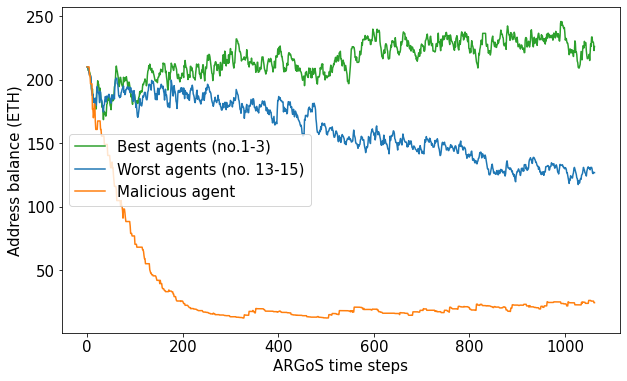

In [320]:
main_log_folder = "/home/hzhao/blockchain_robots/results/161501_paper_config_90min_add"
num_rep = 10
top_agents=5
top_agent_balance_ens =[]
worst_agent_balance_ens = []
malicious_agent_balance_ens = []
idx_list=["%03d" % (x+1) for x in range(num_rep)]
min_lgn=1e6
for exp in idx_list:
    this_log_folder = os.path.join(main_log_folder,exp)
    top_agent_balance, worst_agent_balance, malicious_agent_balance = balanceAnalyse(this_log_folder, top_agents)
    top_agent_balance_ens.append(top_agent_balance)
    worst_agent_balance_ens.append(worst_agent_balance)
    malicious_agent_balance_ens.append(malicious_agent_balance)
    min_lgn = min(len(top_agent_balance), min_lgn)
for idx in range(num_rep):
    top_agent_balance_ens[idx]=top_agent_balance_ens[idx][:min_lgn]
    worst_agent_balance_ens[idx]=worst_agent_balance_ens[idx][:min_lgn]
    malicious_agent_balance_ens[idx]=malicious_agent_balance_ens[idx][:min_lgn]
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.sum(top_agent_balance_ens,axis = 0), 'tab:green', label = "Best agents (no.1-3)")
plt.plot(np.sum(worst_agent_balance_ens,axis = 0), 'tab:blue', label = "Worst agents (no. 13-15)")
plt.plot(np.sum(malicious_agent_balance_ens,axis = 0), 'tab:orange', label = "Malicious agent")
plt.xlabel('ARGoS time steps')
plt.ylabel('Address balance (ETH)')
plt.legend()
#plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_with_malicious_paper_config_0002.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


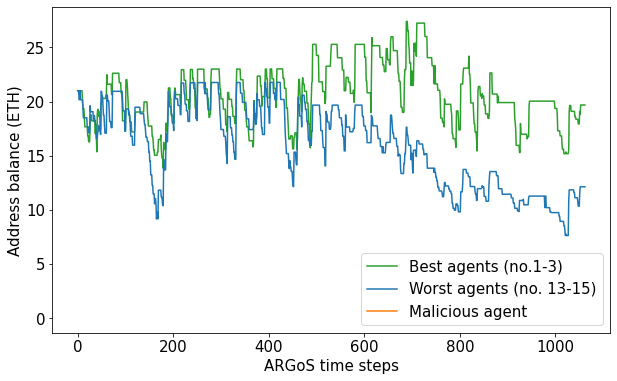

In [310]:

main_log_folder = "/home/hzhao/blockchain_robots/results/161501_paper_config_90min"
num_rep = 1
top_agents = 8
top_agent_balance_ens = []
worst_agent_balance_ens = []
malicious_agent_balance_ens = []
idx_list = ["%03d" % (x + 1) for x in range(num_rep)]
min_lgn = 1e6
for exp in idx_list:
    this_log_folder = os.path.join(main_log_folder, exp)
    top_agent_balance, worst_agent_balance, malicious_agent_balance = balanceAnalyse(this_log_folder, top_agents, num_robots=15)
    top_agent_balance_ens.append(top_agent_balance)
    worst_agent_balance_ens.append(worst_agent_balance)
    min_lgn = min(len(top_agent_balance), min_lgn)
for idx in range(num_rep):
    top_agent_balance_ens[idx] = top_agent_balance_ens[idx][:min_lgn]
    worst_agent_balance_ens[idx] = worst_agent_balance_ens[idx][:min_lgn]
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(np.sum(top_agent_balance_ens, axis=0), 'tab:green', label="Best agents (no.1-3)")
plt.plot(np.sum(worst_agent_balance_ens, axis=0), 'tab:blue', label="Worst agents (no. 13-15)")
plt.plot(np.sum(malicious_agent_balance_ens, axis=0), 'tab:orange', label="Malicious agent")
plt.xlabel('ARGoS time steps')
plt.ylabel('Address balance (ETH)')
plt.legend()
#plt.show()
plt.savefig(
    '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_with_malicious_paper_config_0002.eps',
    format='eps')

/home/hzhao/anaconda3/envs/blockchain_robot/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/hzhao/anaconda3/envs/blockchain_robot/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


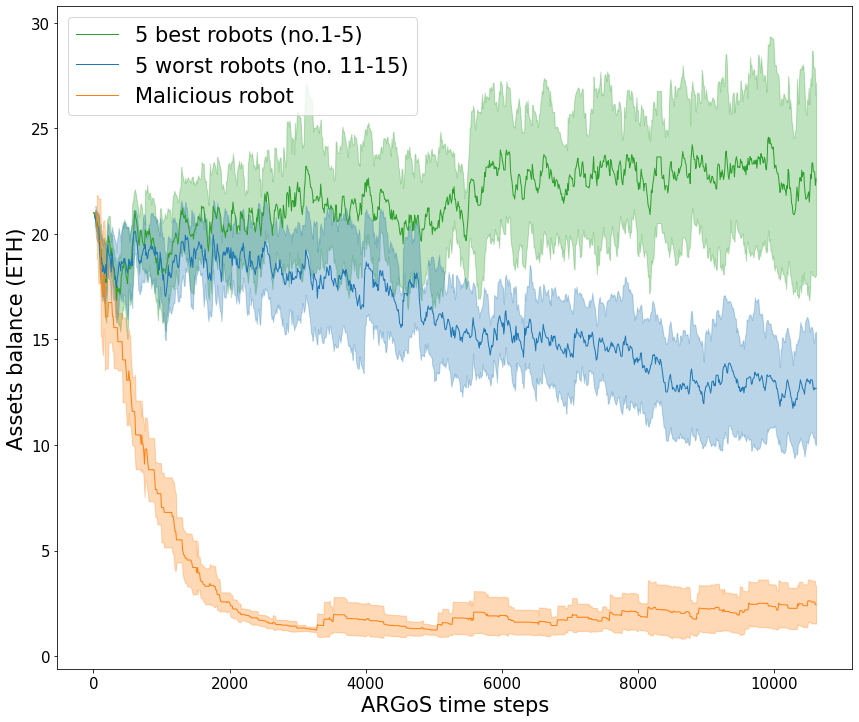

In [331]:
from typing import List, Tuple
from scipy import stats
from pylab import show, xlabel, ylabel, title, plot, fill_between, ylim, legend
import numpy

def plot_with_confidence(data: List[List[float]], color, text, get_x=lambda x:x, alpha=0.95, start_idx=0, scale=1,line_width = 1):
  """Plots data means and confidence intervals."""
  xs = range(len(data))
  ax.plot([get_x(x*scale+start_idx) for x in xs], numpy.mean(numpy.array(data), 1),color,label=text, linewidth=line_width)
  lower_conf, upper_conf = [], []
  for x in xs:
    points = data[x]
    lower, upper = stats.t.interval(
        alpha,
        len(points) - 1,
        loc=numpy.mean(points),
        scale=stats.sem(points))
    lower_conf.append(lower)
    upper_conf.append(upper)
  ax.fill_between([get_x(x*scale+start_idx) for x in xs], lower_conf, upper_conf, color=color, alpha=0.3)

def plot_with_confidence_and_std(data: List[List[float]], color, text, get_x=lambda x:x, alpha=0.95):
  """Plots data means and confidence intervals."""
  xs = range(len(data))
  plot([get_x(x*10) for x in xs], numpy.mean(numpy.array(data), 1),color,label=text)
  lower_conf, upper_conf = [], []
  for x in xs:
    points = data[x]
    lower, upper = stats.t.interval(
        alpha,
        len(points) - 1,
        loc=numpy.mean(points),
        scale=stats.sem(points))
    lower_conf.append(lower)
    upper_conf.append(upper)
  fill_between([get_x(x*10) for x in xs], lower_conf, upper_conf, color=color, alpha=0.3)
  lower_conf, upper_conf = [], []
  for x in xs:
    points = data[x]
    lower = numpy.mean(points) - numpy.std(points)/2
    upper = numpy.mean(points) + numpy.std(points)/2
    lower_conf.append(lower)
    upper_conf.append(upper)
  fill_between([get_x(x*10) for x in xs], lower_conf, upper_conf, color='tab:red', alpha=0.3)
fig=plt.figure(figsize=(12, 10))
ax=fig.add_subplot(111)
plot_with_confidence(numpy.transpose(top_agent_balance_ens), 'tab:green', "5 best robots (no.1-5)", scale=10)
plot_with_confidence(numpy.transpose(worst_agent_balance_ens), 'tab:blue', "5 worst robots (no. 11-15)", scale=10)
plot_with_confidence(numpy.transpose(malicious_agent_balance_ens), 'tab:orange', "Malicious robot",scale=10)
plt.xlabel('ARGoS time steps', fontsize=21)
plt.ylabel('Assets balance (ETH)', fontsize=21)

plt.legend(loc=2,prop={'size': 21})
plt.subplots_adjust(top=0.99, right=0.99, left=0.07, bottom=0.07)

plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_with_malicious_paper_config_00021.pdf', format='pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/home/hzhao/blockchain_robots/results/161501_paper_config_60min_add_20agents_all_normal_no_min_balance_friction_add/001/1/cluster_status.csv
['1', '1662840416.803', '(-3288,', '-61449,', '1662835311,', '2,', '15,', '99999999999999999990,', '66666666666666666660,', '1,', "'0xa79160bC038C07678C145f1B5220be15bAdB13d7',", '0)', '1']
15 99999999999999999990, 1,
['1', '1662840416.803', '(-57960,', '-29600,', '1662836244,', '2,', '15,', '97407407407407407398,', '69629629629629629623,', '1,', "'0x26CbcaC5281B6E159bc3e6C7400AF25fA46F246B',", '0)', '1']
15 97407407407407407398, 1,
['1', '1662840416.804', '(60276,', '20719,', '1662836513,', '2,', '15,', '75578002244668911332,', '61773288439955106619,', '1,', "'0xc72B1b70e69D270544369132d53529e37Be87742',", '0)', '1']
15 75578002244668911332, 1,
['1', '1662840416.804', '(-3496,', '-61038,', '1662836815,', '2,', '15,', '59462430573541684647,', '50230510230510230505,', '1,', "'0x26CbcaC5281B6E159bc3e6C7400AF25fA46F246B',", '0)', '1']
15 594624305735

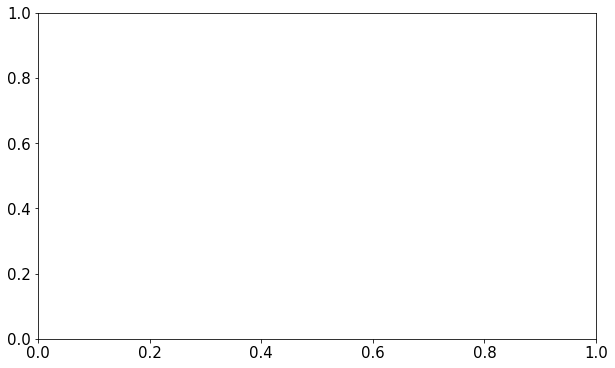

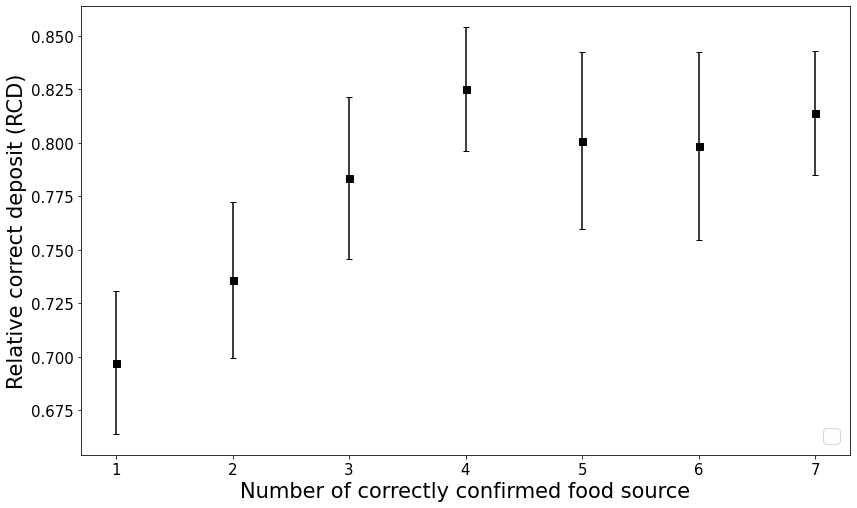

In [330]:

def get_positive_ratio(log_folder, sw=5):
    ratio_list=[]
    ratio_idx_list=[]
    idx=1
    csv_file = log_folder+'/'+str(int(1))+'/cluster_status.csv'
    print(csv_file)
    ratio_list_smooth=[]
    with open(csv_file,"r") as f:
            reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
            next(reader, None)
            row_count=0
            for row in reader:
                print(row)
                if len(row)>0:
                    print(row[6][0:2],row[7],row[9])
                    if int(row[9][0]) ==1  and int(row[-1]) == 1:
                        #print(row[8],row[7],row[9])
                        ratio_list.append(float(row[8][:-1])/float(row[7][:-1]))
                        ratio_idx_list.append(idx)
                idx+=1

    for idx in range(len(ratio_list)-sw):
        ratio_list_smooth.append(np.sum(ratio_list[idx:idx+sw])/sw)
    return ratio_list_smooth

def error_plot_with_confidence(data: List[List[float]], color, text, get_x=lambda x:x, alpha=0.95, start_idx=0, line_width = 1):
    fig1, ax1 = plt.subplots()
    xs = range(len(data))
    lower_err, upper_err = [], []
    for x in xs:
        points = data[x]
        lower, upper = stats.t.interval(
            alpha,
            len(points) - 1,
            loc=numpy.mean(points),
            scale=stats.sem(points))
        lower_err.append(numpy.mean(points)-lower)
        upper_err.append(upper-numpy.mean(points))
    asymmetric_error = np.array(list(zip(lower_err, upper_err))).T
    fig=plt.figure(figsize=(12, 7))
    ax=fig.add_subplot(111)
    ax.errorbar(x=[x+start_idx for x in range(len(data))], y=numpy.mean(numpy.array(data), 1), yerr=asymmetric_error, color="black", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black")

def box_plot_with_confidence(data: List[List[float]], color, text, get_x=lambda x:x, alpha=0.95, start_idx=0, line_width = 1):
    fig1, ax1 = plt.subplots()
    xs = range(len(data))
    lower_err, upper_err = [], []
    for x in xs:
        points = data[x]
        lower, upper = stats.t.interval(
            alpha,
            len(points) - 1,
            loc=numpy.mean(points),
            scale=stats.sem(points))
        lower_err.append(numpy.mean(points)-lower)
        upper_err.append(upper-numpy.mean(points))
    asymmetric_error = np.array(list(zip(lower_err, upper_err))).T
    fig=plt.figure(figsize=(12, 12))
    plt.boxplot(numpy.array(data).T)
main_log_folder = "/home/hzhao/blockchain_robots/results/161501_paper_config_60min_add_20agents_all_normal_no_min_balance_friction_add"
log_folder_lst = [main_log_folder]
log_folder_lst.append("/home/hzhao/blockchain_robots/results/161501_paper_config_120min_add_20_all_normal_no_min_balance_100trial_friction")
log_folder_lst.append("/home/hzhao/blockchain_robots/results/161501_paper_config_60min_add_20agents_all_normal_no_min_balance_friction_addb")
#log_folder_lst.append("/home/hzhao/blockchain_robots/results/161501_paper_config_60min_add_20agents_all_normal_no_min_balance_friction_addc")

pos_rate_smooth_ens =[]

min_lgn=1e6
for folder in log_folder_lst:
    num_rep = len([name for name in os.listdir(folder) if os.path.isdir(folder)])
    idx_list=["%03d" % (x+1) for x in range(num_rep)]
    for exp in idx_list:
        this_log_folder = os.path.join(folder,exp)
        this_pos_rate_smooth = get_positive_ratio(this_log_folder, sw=1)
        #print(this_pos_rate_smooth)
        pos_rate_smooth_ens.append(this_pos_rate_smooth)
        min_lgn = min(len(this_pos_rate_smooth), min_lgn)
        print(min_lgn)
    for idx in range(len(pos_rate_smooth_ens)):
        pos_rate_smooth_ens[idx]=pos_rate_smooth_ens[idx][:min_lgn]

error_plot_with_confidence(numpy.transpose(pos_rate_smooth_ens), 'tab:blue', "Averaged RCD over 15 runs", alpha=0.95, start_idx=1, line_width = 2.5)
plt.xlabel('Number of correctly confirmed food source', fontsize=21)
plt.ylabel('Relative correct deposit (RCD)', fontsize=21)

plt.legend(loc=4,prop={'size': 21})
plt.subplots_adjust(top=0.99, right=0.99, left=0.10, bottom=0.10)
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/RCD_evolution_15.pdf', format='pdf')
plt.show()
#plt.figure(figsize=(12, 8))
#box_plot_with_confidence(numpy.transpose(pos_rate_smooth_ens), 'tab:blue', "Averaged RCD over 15 runs", alpha=0.95, start_idx=1, line_width = 2.5)
#plt.show()